## Problem statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## Hypothesis genaration

Product Brand: well-known brands might sell better compared to other brands.

Product Type: Certain product categories might have higher sales due to their popularity or essential nature.

Quality: Higher quality products might have better sales due to positive customer feedback.

Promotions: Products on promotion or with discounts might experience increased sales.

#### Store-related Hypotheses:
Location: Stores located in more densely populated areas might have higher sales.

Store Size: Larger stores could potentially carry a wider variety of products and attract more customers.

Customer Service: Stores with good customer service might retain more customers and lead to higher sales.

#### Time-related Hypotheses:
Seasonality: Sales might vary based on seasons, holidays, or special occasions.

Trends: Sales might be influenced by emerging trends or fads.

#### Price-related Hypotheses:
Product Price: Products priced at specific points might affect customer decisions.

Discount Impact: Different levels of discounts might lead to varying sales increases.

#### Advertising and Promotion-related Hypotheses:
Advertising Channels: Different advertising channels might have varying impacts on sales.

Social Media: Engaging with customers on social media platforms might drive more sales.

Product Displays: Eye-catching in-store displays might lead to more sales.

#### Demographic and Customer-related Hypotheses:
Customer Profiles: Different customer segments might have varying preferences and purchasing behaviors.

Age/Gender: Sales might differ based on the age and gender of the customers.

#### Economic and External Factors:
Economic Conditions: Sales might be influenced by economic factors like inflation, unemployment, etc.

Competitor Influence: Activities by competitors might impact sales.

## Load data

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#visualizing Charts
plt.rcParams['figure.figsize'] = [15,6]
import warnings
warnings.filterwarnings("ignore")

In [150]:
df=pd.read_csv("C:/Users/SREERAG/Desktop/predictive analysis on bigmart sales/Train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Data structure and content

In [151]:
df.shape

(8523, 12)

In [152]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Exploratory Data Analysis

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [154]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [155]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Univariate Analysis

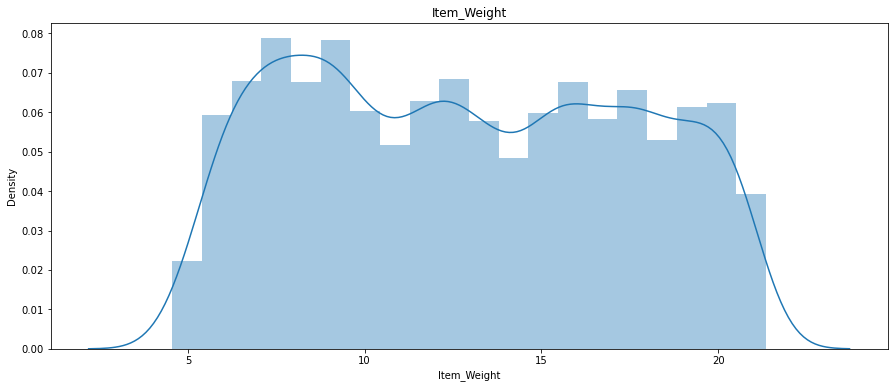

In [156]:
#item_weight
sns.distplot(df.Item_Weight)
plt.title('Item_Weight')
plt.show()
#since the spread of the data is high, we can assume that the data is uniformly disrtributed

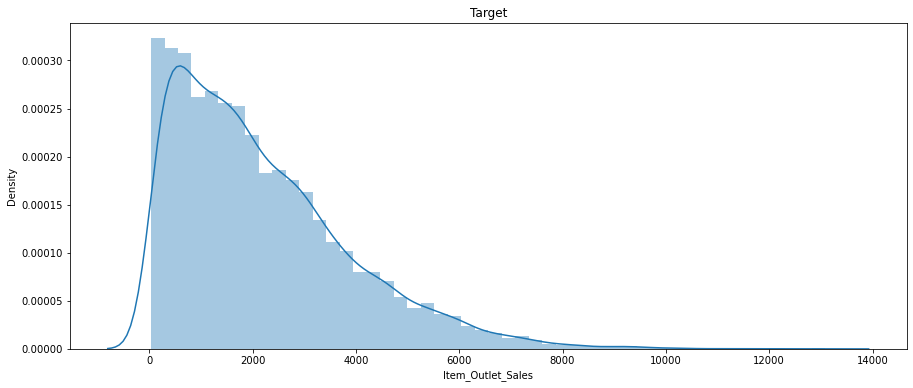

In [157]:
#target variable
sns.distplot(df.Item_Outlet_Sales)
plt.title('Target')
plt.show()

In [158]:
#statistical summary of data
df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [159]:
#skewness
print('skewness',df.Item_Outlet_Sales.skew())

#mode

print('mode',df.Item_Outlet_Sales.mode()[0])

skewness 1.1775306028542796
mode 958.752


### Skewness

* the skewness refers the distortion in  the shape of the data due to the presence of outliers.

* if the data is +vely skewed, we will see the skweness value as +ve and vice versa for -ve 

*  the skewness is b/w **0 to 0.5**, we say  the data is normal

* however the range of skewness is b/w **0.5 to 1** we will say the  data is **moderately skewed**
* if the skewness is 1 or more than 1 ,it is perfectly skewed 

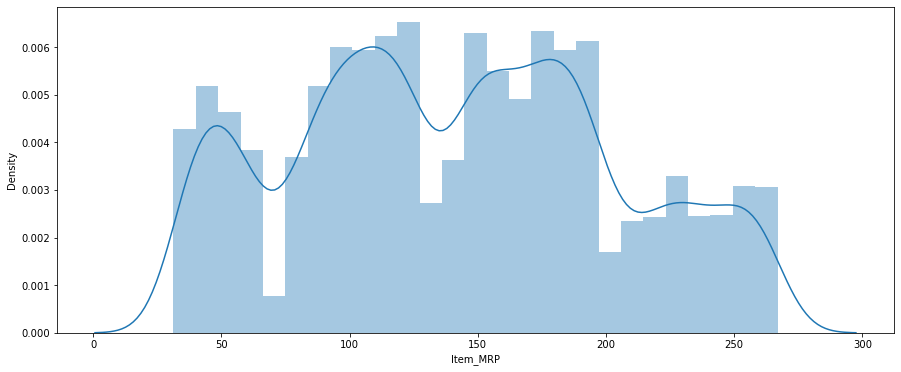

In [160]:
#Item MRP
sns.distplot(df.Item_MRP)
plt.show()


#Item MRP shows 4 different frequencies and by looking at it (the gaps between the modes)
# it is clear that it is Multimodel Data 

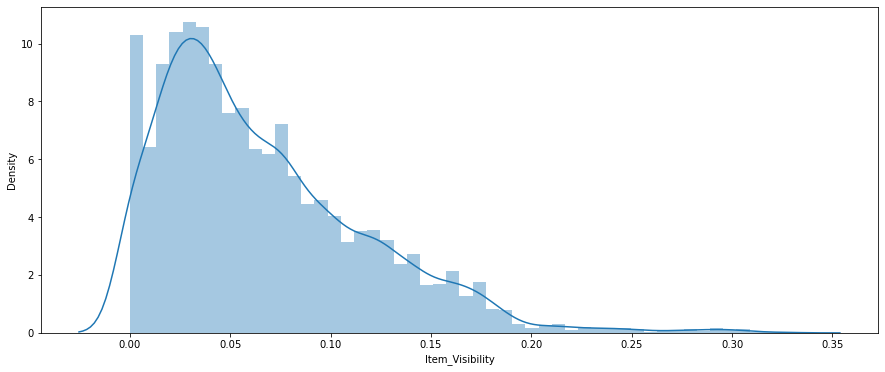

In [161]:
# Item Visibility

sns.distplot(df.Item_Visibility)
plt.show()

In [162]:
#find out list of categories

df.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

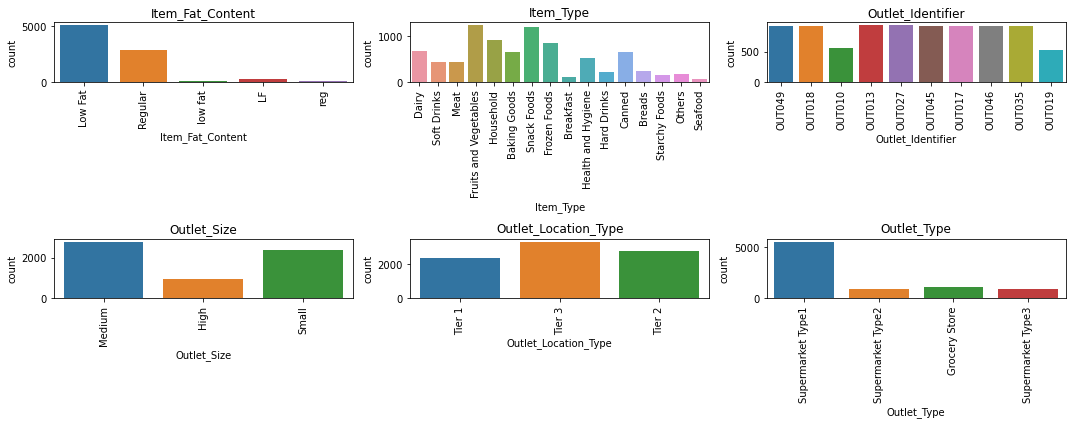

In [163]:
cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
     'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
rows=2
columns=3
iterator=1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i])
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation=90) 
    
plt.tight_layout() 
plt.show()

### inference


**Univariate analysis**
1. Most of the products that are sold are **low fat** items
2. the top 5 item types are **fruit and veggies,dairy,snack food, household etc**
3. most of the outkets in the business are **medium** size outlet
4. the business has opened most of their outlets in **tier 3 cities**
5. the type of outlet is **supermarket type1**


## Bivariate analysis- num vs num

*Predictors vs Target

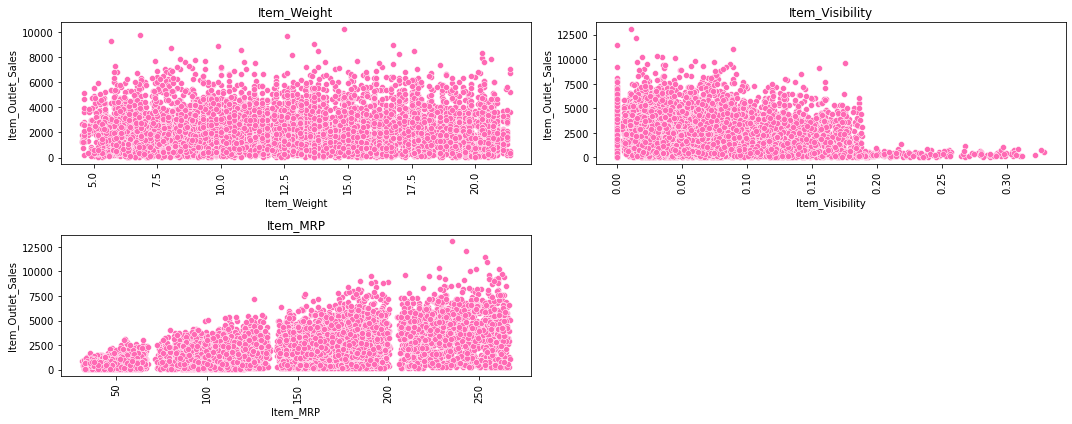

In [164]:


cols=['Item_Weight','Item_Visibility','Item_MRP']

rows = 2
columns = 2
iterator = 1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.scatterplot(df.loc[:,i],df.Item_Outlet_Sales,color='hotpink') #x,y
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

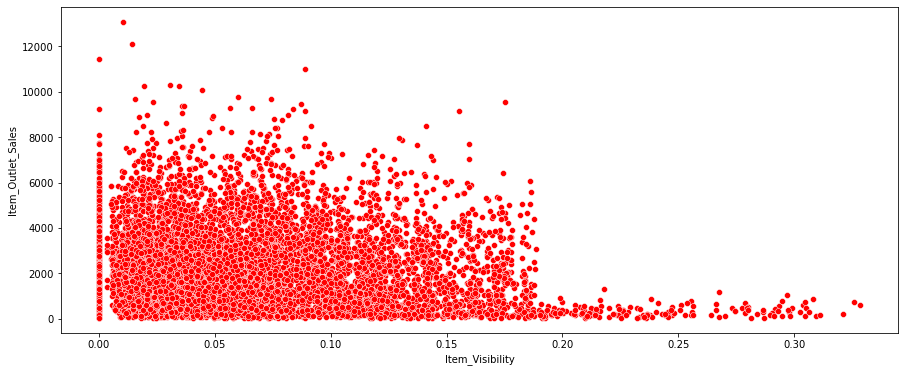

In [165]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df,color='red')




#### item visibility has 0s and as the visibility increases , sales goes down
#### in other words, highly visible items have low sales

## bivariate- cat vs num

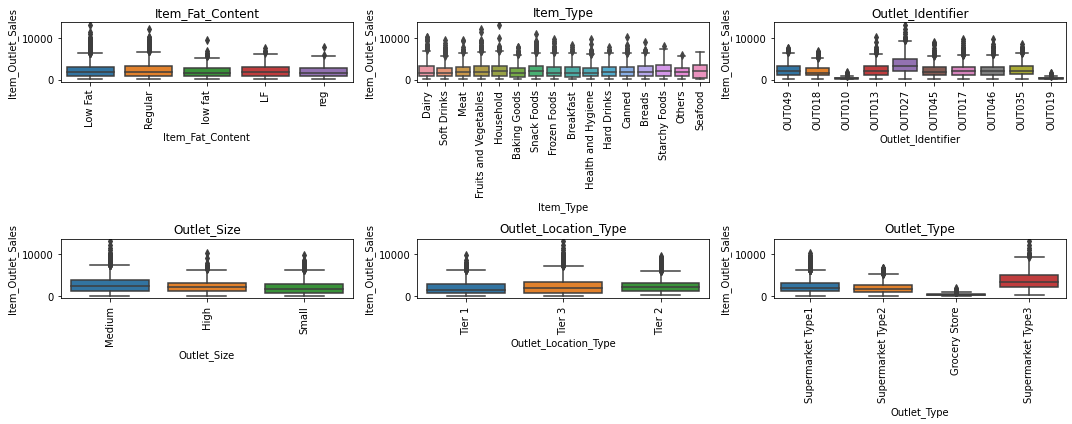

In [166]:
cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

rows=2
columns=3
iterator=1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(df.loc[:,i],df.Item_Outlet_Sales)
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation=90) 
    
plt.tight_layout()
plt.show()

In [167]:
#calculate the quantities for the target

print('Q1:',df.Item_Outlet_Sales.quantile(0.25))
print('Q2:',df.Item_Outlet_Sales.quantile(0.50))
print('Q3:',df.Item_Outlet_Sales.quantile(0.75))


q3= df.Item_Outlet_Sales.quantile(0.75)
q1=df.Item_Outlet_Sales.quantile(0.25)
print('IQR: ',q3-q1)

Q1: 834.2474
Q2: 1794.331
Q3: 3101.2964
IQR:  2267.049


In [168]:
df.quantile(0.75) - df.quantile(0.25)

Item_Weight                     8.076250
Item_Visibility                 0.067596
Item_MRP                       91.817200
Outlet_Establishment_Year      17.000000
Item_Outlet_Sales            2267.049000
dtype: float64

### notes

1. sales.quantile can calculate the quantile values for all the numerical variables
2. outliers can be defined as value > than **Q3+1.5*IQR** where the IQR is Q3-Q1
3. inliers or the outliers on the lower are defined as **value < than Q1-1.5IQR**

## Multivariate analysis

<AxesSubplot:>

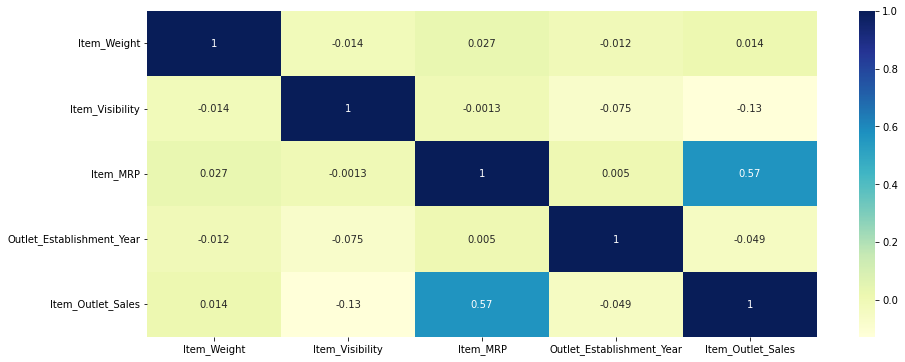

In [169]:
#heat map
#correlation
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

#### the is no correlation between any variables

<AxesSubplot:>

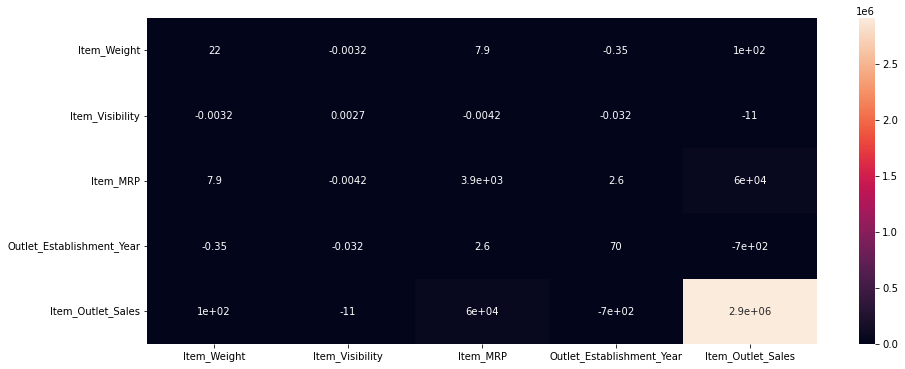

In [170]:
#covariance
sns.heatmap(df.cov(),annot=True)

## Check for unique values

In [171]:
print(df['Item_Fat_Content'].unique())
print(df['Item_Type'].unique())
print(df['Outlet_Establishment_Year'].sort_values().unique())
print(df['Outlet_Size'].unique())
print(df['Outlet_Location_Type'].unique())
print(df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1985 1987 1997 1998 1999 2002 2004 2007 2009]
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [172]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

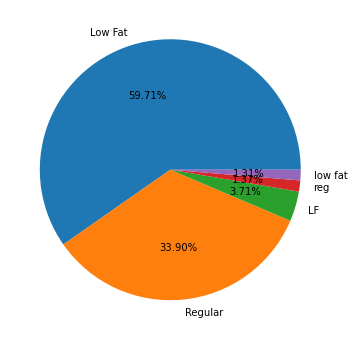

In [173]:
fat=df.Item_Fat_Content.value_counts().index
vals=df.Item_Fat_Content.value_counts().values
plt.pie(vals,labels=fat,autopct='%1.2f%%')
plt.show()

In [174]:
#changing LF , low fat into Low Fat and reg into Regular
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg', 'Regular')

In [175]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

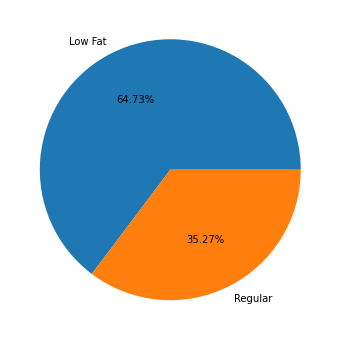

In [176]:
fat=df.Item_Fat_Content.value_counts().index
vals=df.Item_Fat_Content.value_counts().values
plt.pie(vals,labels=fat,autopct='%1.2f%%')
plt.show()

## Missing value treatment

In [177]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [178]:
df.isnull().sum()[df.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [179]:
# Checking percentage of NULL values
print("Item Weight NULL value percentage", 1463/8523)
print("Outlet Size NULL value percentage", 2410/8523)

Item Weight NULL value percentage 0.1716531737651062
Outlet Size NULL value percentage 0.2827642848762173


ITEM WEIGHT is a numeric column, so it needs to be imputed with MEAN or MEDIAN or MODE. (Median is considered more usefull during imputing)

OUTLET SIZE is a categorical column, so it need to be imputed with MODE.

In [180]:
df.loc[df.Item_Fat_Content=='Low Fat','Item_Weight'].median()

12.65

In [181]:
df['Item_Weight'].median()

12.6

In [182]:
print(df['Item_Weight'].median())
print(df['Outlet_Size'].mode())

12.6
0    Medium
Name: Outlet_Size, dtype: object


In [183]:
# Imputing the columns
df['Item_Weight']=df['Item_Weight'].fillna(12.6)
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [184]:
#null values imputed successfully
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## outlier treatment

Item_Weight                     AxesSubplot(0.125,0.125;0.133621x0.755)
Item_Visibility              AxesSubplot(0.285345,0.125;0.133621x0.755)
Item_MRP                      AxesSubplot(0.44569,0.125;0.133621x0.755)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.125;0.133621x0.755)
Item_Outlet_Sales            AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

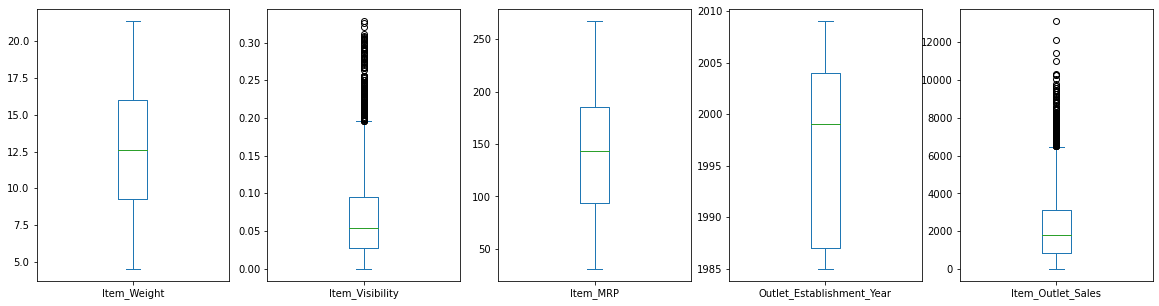

In [185]:
df.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

In [186]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr

trimmed_data = df[~((df>upper) | (df<lower)).any(axis=1)]
trimmed_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [187]:
trimmed_data.shape

(8193, 12)

In [188]:
df.shape

(8523, 12)

Item_Weight                     AxesSubplot(0.125,0.125;0.133621x0.755)
Item_Visibility              AxesSubplot(0.285345,0.125;0.133621x0.755)
Item_MRP                      AxesSubplot(0.44569,0.125;0.133621x0.755)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.125;0.133621x0.755)
Item_Outlet_Sales            AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

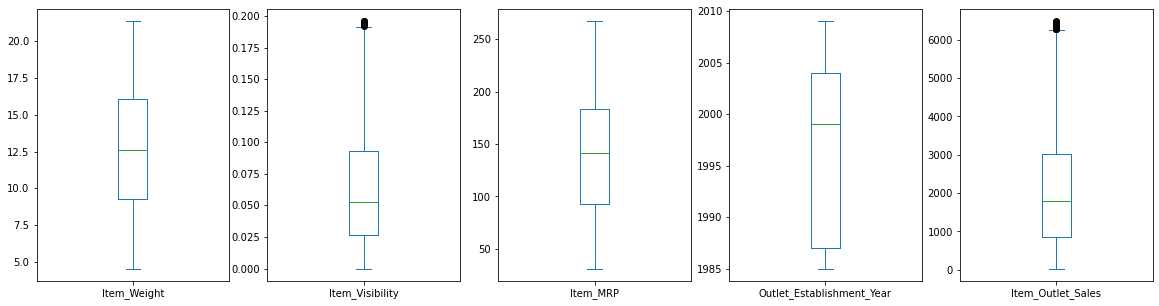

In [189]:
trimmed_data.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

In [190]:
trimmed_data.std()

Item_Weight                     4.268070
Item_Visibility                 0.046285
Item_MRP                       61.536438
Outlet_Establishment_Year       8.286946
Item_Outlet_Sales            1501.498356
dtype: float64

In [191]:
#calculate the coefficient of variation(cv) in the data
trimmed_data.std()/trimmed_data.mean()

Item_Weight                  0.332830
Item_Visibility              0.732108
Item_MRP                     0.442377
Outlet_Establishment_Year    0.004147
Item_Outlet_Sales            0.718578
dtype: float64

### interpretation of Coeff of variation

* coefficient of variation (CV) suggests which of the categories have th e lowest variation wrt **Mean** .
* it is calculated as **std/mean** which means what % of the data is deviating from the **mean**

* Higher the CV, less reliable that variable in the data is 
* lower the CV , we can count that feature more

note:Low CV is always prefered when comparing two or more 
  products/employees/sports player/stocks etc

In [192]:
trimmed_data.kurt()

Item_Weight                 -0.898131
Item_Visibility             -0.270940
Item_MRP                    -0.854033
Outlet_Establishment_Year   -1.144091
Item_Outlet_Sales           -0.129712
dtype: float64

### KURTOSIS

* Tells you the shape of the data
* It tells us by looking at the **peakendness of the data**
* Here the peakendness of the data represents **heavy tails** or **light Tails**
* The Normal Distribution Curve can be divided in 03 parts-
   **Mesokurtic Curve, Platykurtic and LepoKurtic Curve**
   
* Note: Normal Distribution is **Mesokurtic Curve** with a kurtosis of **3**

* Note: If any curve has  a Kurtosis of <3,Platykurtic curve and if it is >3, It is Leptokurtic

Note: the standard relation is skewness=0 and kurtosis=3 for the data to be normal

In [193]:
#preprocessing

In [194]:
df1=trimmed_data.select_dtypes(include=np.number)
df1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


## Feature Engineering

### binning the categorical variables

In [195]:
trimmed_data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

#### binning into perishable and non perishable
#### perishable:likely to decay or go bad quickly
#### non_perishable: processed or packaged to withstand prolonged storage

In [196]:
perish=['Dairy','Meat', 'Fruits and Vegetables', 'Breakfast','Breads','Starchy Foods','Seafood']

In [197]:
def perish_ables(x):
    if x in perish:
        return ('perishable')
    else:
        return ('non_perishable')

In [198]:
trimmed_data['Item_Type_Cat']=trimmed_data.Item_Type.apply(perish_ables)

In [199]:
trimmed_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,perishable
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable


In [200]:
#Extracting the first 02 letters from the Item ID

trimmed_data.Item_Identifier[0][:2]

'FD'

In [201]:
ids =[]
for i in trimmed_data.Item_Identifier:
    ids.append(i[:2])
ids

['FD',
 'DR',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'DR',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'NC',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'DR',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'NC',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'DR',
 'NC',
 'NC',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'NC',
 'NC',
 'NC',
 'NC',
 'FD',
 'FD',
 'NC',
 'FD',
 'NC',

In [202]:
trimmed_data['Item_Identifier']= ids
trimmed_data['Item_Identifier']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8193, dtype: object

In [203]:
trimmed_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,FD,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,perishable
4,NC,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,non_perishable
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,non_perishable
8520,NC,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,non_perishable
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,non_perishable


In [204]:
trimmed_data.Item_Identifier.unique()

array(['FD', 'DR', 'NC'], dtype=object)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

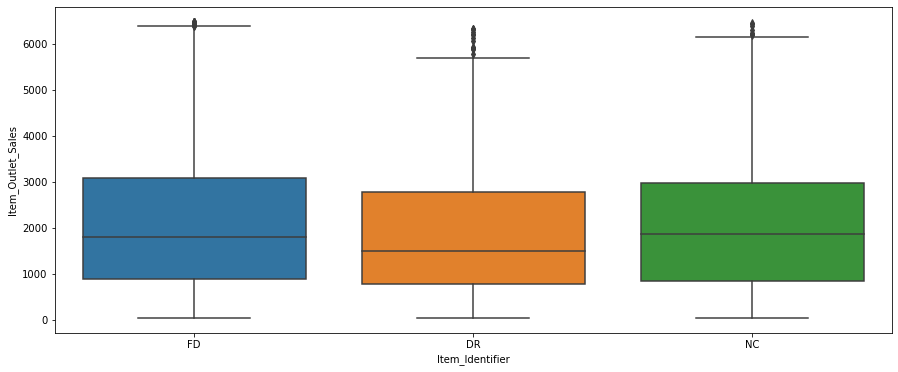

In [205]:
sns.boxplot(x='Item_Identifier',y='Item_Outlet_Sales',data=trimmed_data)

#### here FD if food items
####         DR is drink items
####        NC is non consumables

##### replacing the item fat content where the item ID is NC

In [206]:
trimmed_data.loc[trimmed_data.Item_Identifier=='NC','Item_Fat_Content']='Non Edible'

In [207]:
trimmed_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,FD,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,perishable
4,NC,8.930,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,non_perishable
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,non_perishable
8520,NC,10.600,Non Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,non_perishable
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,non_perishable


#### there is no zero item visibility items in a store so replace it with median

In [208]:
#replacing 0s in Item Visibility
trimmed_data['Item_Visibility']=trimmed_data.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x:x.replace(to_replace = 0,value=x.median()))

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

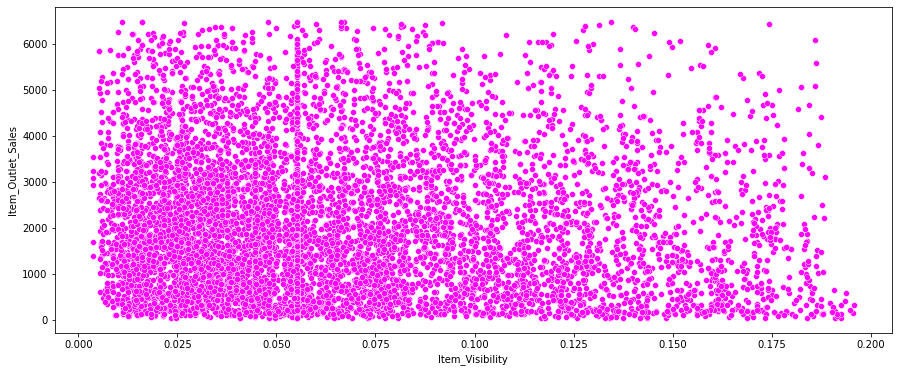

In [209]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=trimmed_data,color='magenta')

## Encoding

In [210]:
#Lable Encoder : Item_Fat_Content, Outlet_Size, Outlet_Location_Type


#One-hot Encoder : Item_Type, Outlet_Identifier, Outlet_Type,Item_Type_Cat

In [211]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
trimmed_data['Item_Fat_Content']=label.fit_transform(trimmed_data['Item_Fat_Content'])
trimmed_data['Outlet_Size']=label.fit_transform(trimmed_data['Outlet_Size'])
trimmed_data['Outlet_Location_Type']=label.fit_transform(trimmed_data['Outlet_Location_Type'])
trimmed_data['Outlet_Location_Type']=label.fit_transform(trimmed_data['Outlet_Location_Type'])

In [212]:
trimmed_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat
0,FD,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,perishable
1,DR,5.920,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,non_perishable
2,FD,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,perishable
3,FD,19.200,2,0.055141,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,perishable
4,NC,8.930,1,0.044608,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,non_perishable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,2,Supermarket Type1,2778.3834,non_perishable
8519,FD,8.380,2,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,Supermarket Type1,549.2850,non_perishable
8520,NC,10.600,1,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,1,Supermarket Type1,1193.1136,non_perishable
8521,FD,7.210,2,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,Supermarket Type2,1845.5976,non_perishable


In [213]:
d=pd.get_dummies(trimmed_data['Item_Type'])
trimmed_data=pd.concat([trimmed_data, d], axis=1)

df=pd.get_dummies(trimmed_data['Outlet_Identifier'])
trimmed_data=pd.concat([trimmed_data, d], axis=1)

d=pd.get_dummies(trimmed_data['Outlet_Type'])
trimmed_data=pd.concat([trimmed_data, d], axis=1)

d=pd.get_dummies(trimmed_data['Item_Type_Cat'])
trimmed_data=pd.concat([trimmed_data, d], axis=1)

In [214]:
trimmed_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,non_perishable,perishable
0,FD,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,0,0,0,0,0,1,0,0,0,1
1,DR,5.920,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,0,0,1,0,0,0,1,0,1,0
2,FD,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,...,0,0,0,0,0,1,0,0,0,1
3,FD,19.200,2,0.055141,Fruits and Vegetables,182.0950,OUT010,1998,1,2,...,0,0,0,0,1,0,0,0,0,1
4,NC,8.930,1,0.044608,Household,53.8614,OUT013,1987,0,2,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,2,...,0,1,0,0,0,1,0,0,1,0
8519,FD,8.380,2,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,...,0,0,0,0,0,1,0,0,1,0
8520,NC,10.600,1,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,1,...,0,0,0,0,0,1,0,0,1,0
8521,FD,7.210,2,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,...,0,1,0,0,0,0,1,0,1,0


In [215]:
trimmed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 0 to 8522
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8193 non-null   object 
 1   Item_Weight                8193 non-null   float64
 2   Item_Fat_Content           8193 non-null   int32  
 3   Item_Visibility            8193 non-null   float64
 4   Item_Type                  8193 non-null   object 
 5   Item_MRP                   8193 non-null   float64
 6   Outlet_Identifier          8193 non-null   object 
 7   Outlet_Establishment_Year  8193 non-null   int64  
 8   Outlet_Size                8193 non-null   int32  
 9   Outlet_Location_Type       8193 non-null   int64  
 10  Outlet_Type                8193 non-null   object 
 11  Item_Outlet_Sales          8193 non-null   float64
 12  Item_Type_Cat              8193 non-null   object 
 13  Baking Goods               8193 non-null   uint8

In [216]:
trimmed_data=trimmed_data.drop('Item_Identifier',axis=1)
trimmed_data=trimmed_data.drop('Item_Type',axis=1)
trimmed_data=trimmed_data.drop('Outlet_Identifier',axis=1)
trimmed_data=trimmed_data.drop('Outlet_Type',axis=1)
trimmed_data=trimmed_data.drop('Item_Type_Cat',axis=1)

In [217]:
trimmed_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Baking Goods,Breads,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,non_perishable,perishable
0,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,0,0,...,0,0,0,0,0,1,0,0,0,1
1,5.920,2,0.019278,48.2692,2009,1,2,443.4228,0,0,...,0,0,1,0,0,0,1,0,1,0
2,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,0,0,...,0,0,0,0,0,1,0,0,0,1
3,19.200,2,0.055141,182.0950,1998,1,2,732.3800,0,0,...,0,0,0,0,1,0,0,0,0,1
4,8.930,1,0.044608,53.8614,1987,0,2,994.7052,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,0,0,...,0,1,0,0,0,1,0,0,1,0
8519,8.380,2,0.046982,108.1570,2002,1,1,549.2850,1,0,...,0,0,0,0,0,1,0,0,1,0
8520,10.600,1,0.035186,85.1224,2004,2,1,1193.1136,0,0,...,0,0,0,0,0,1,0,0,1,0
8521,7.210,2,0.145221,103.1332,2009,1,2,1845.5976,0,0,...,0,1,0,0,0,0,1,0,1,0


In [218]:
trimmed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 0 to 8522
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8193 non-null   float64
 1   Item_Fat_Content           8193 non-null   int32  
 2   Item_Visibility            8193 non-null   float64
 3   Item_MRP                   8193 non-null   float64
 4   Outlet_Establishment_Year  8193 non-null   int64  
 5   Outlet_Size                8193 non-null   int32  
 6   Outlet_Location_Type       8193 non-null   int64  
 7   Item_Outlet_Sales          8193 non-null   float64
 8   Baking Goods               8193 non-null   uint8  
 9   Breads                     8193 non-null   uint8  
 10  Breakfast                  8193 non-null   uint8  
 11  Canned                     8193 non-null   uint8  
 12  Dairy                      8193 non-null   uint8  
 13  Frozen Foods               8193 non-null   uint8

In [219]:
#scaling

In [220]:
#from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [221]:

#sc= StandardScaler()
#mmax=MinMaxScaler()

In [222]:
#df2=trimmed_data.select_dtypes(include=np.number)
#df2

In [223]:
#scaled=pd.DataFrame(sc.fit_transform(df2),columns=df2.columns) # return array so change into dataframe
#scaled

In [224]:
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

In [225]:
stat, p = jarque_bera(trimmed_data["Item_Outlet_Sales"])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=811.991, p-value=0.000
The data is not normally distributed (reject H0)


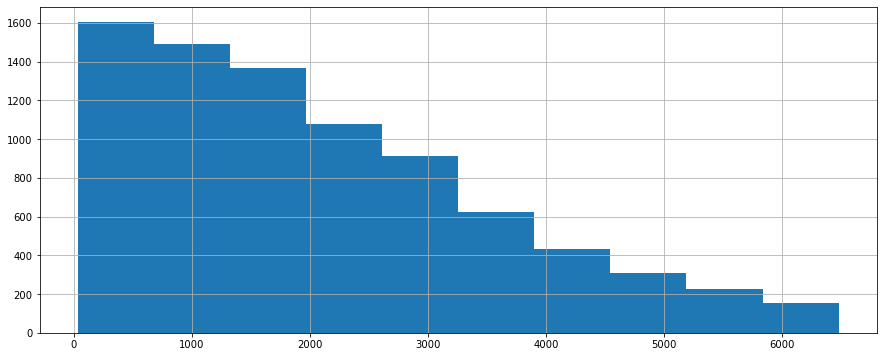

In [226]:
trimmed_data.Item_Outlet_Sales.hist()

# display the plot
plt.show()

In [227]:
import scipy.stats as stats

print('Before Transformation',trimmed_data.Item_Outlet_Sales.skew())
print('After Transformation',np.log(trimmed_data.Item_Outlet_Sales).skew())

#negatively skewed

Before Transformation 0.7685148064520094
After Transformation -0.980812847630719


In [228]:
#square root transformation
print('Before Transformation',trimmed_data.Item_Outlet_Sales.skew())
print('After Transformation',np.sqrt(trimmed_data.Item_Outlet_Sales).skew())

#skewness reduced and better than log transformation

Before Transformation 0.7685148064520094
After Transformation 0.049693622699468754


In [229]:
#power transformation
print('Before Transformation',trimmed_data.Item_Outlet_Sales.skew())
print('After Transformation',(1/trimmed_data.Item_Outlet_Sales).skew())

#data become more skewed
# if the data is negatively skewed we can try power transformation to 
#reduce the skewness in the -ve direction

Before Transformation 0.7685148064520094
After Transformation 5.883280707077055


In [230]:
#boxcox transformation
print('Before Transformation',trimmed_data.Item_Outlet_Sales.skew())
print('After Transformation',pd.Series(stats.boxcox(trimmed_data.Item_Outlet_Sales)[0]).skew())

Before Transformation 0.7685148064520094
After Transformation -0.1053351166966945


In [231]:
#yeojohnson transformation
print('Before Transformation',trimmed_data.Item_Outlet_Sales.skew())
print('After Transformation',pd.Series(stats.yeojohnson(trimmed_data.Item_Outlet_Sales)[0]).skew())

Before Transformation 0.7685148064520094
After Transformation -0.10506681015758121


Text(0.5, 1.0, 'SQRT transformation')

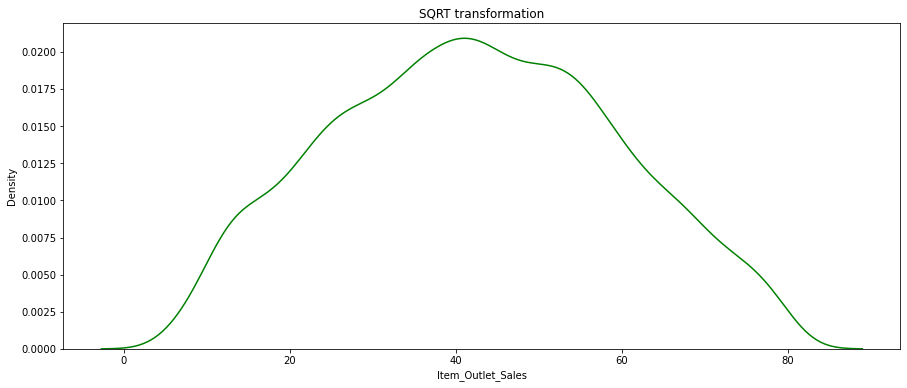

In [232]:
sns.distplot(np.sqrt(trimmed_data.Item_Outlet_Sales),kde=True,hist=False,color='green')

plt.title('SQRT transformation')

Text(0.5, 1.0, 'yoejohnson transformation')

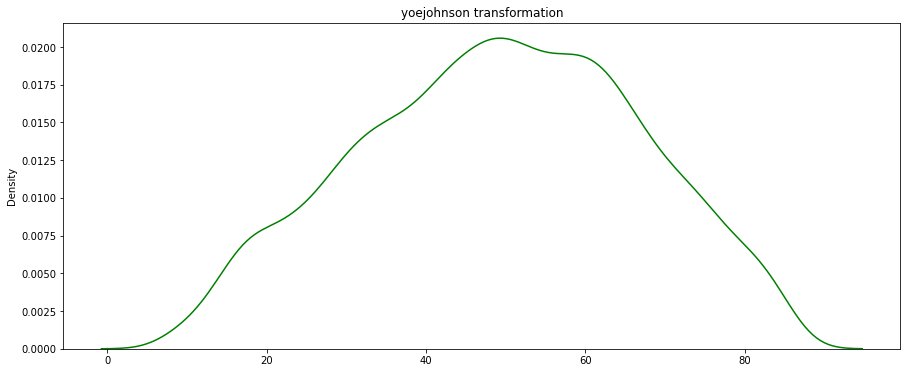

In [233]:
sns.distplot(pd.Series(stats.yeojohnson(trimmed_data.Item_Outlet_Sales)[0]),kde=True,hist=False,color='green')
             
plt.title('yoejohnson transformation')

In [234]:
#sqrt transform gives the best

In [235]:
trimmed_data['sqrt_Item_Outlet_Sales'] = np.sqrt(trimmed_data.Item_Outlet_Sales)
trimmed_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Baking Goods,Breads,...,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,non_perishable,perishable,sqrt_Item_Outlet_Sales
0,9.30,0,0.016047,249.8092,1999,1,0,3735.1380,0,0,...,0,0,0,0,1,0,0,0,1,61.115775
1,5.92,2,0.019278,48.2692,2009,1,2,443.4228,0,0,...,0,1,0,0,0,1,0,1,0,21.057607
2,17.50,0,0.016760,141.6180,1999,1,0,2097.2700,0,0,...,0,0,0,0,1,0,0,0,1,45.795961
3,19.20,2,0.055141,182.0950,1998,1,2,732.3800,0,0,...,0,0,0,1,0,0,0,0,1,27.062520
4,8.93,1,0.044608,53.8614,1987,0,2,994.7052,0,0,...,0,0,0,0,1,0,0,1,0,31.538947


In [236]:
#trimmed_data['yeo_Item_Outlet_Sales'] = pd.Series(stats.yeojohnson(trimmed_data.Item_Outlet_Sales)[0])
#trimmed_data.head()

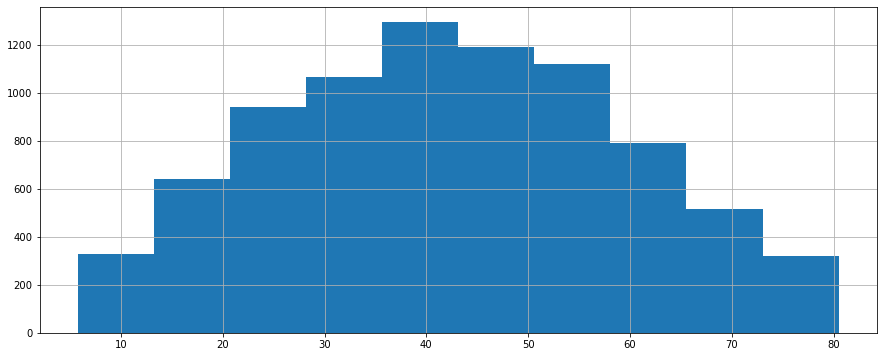

In [237]:
trimmed_data.sqrt_Item_Outlet_Sales.hist()
# display the plot
plt.show()

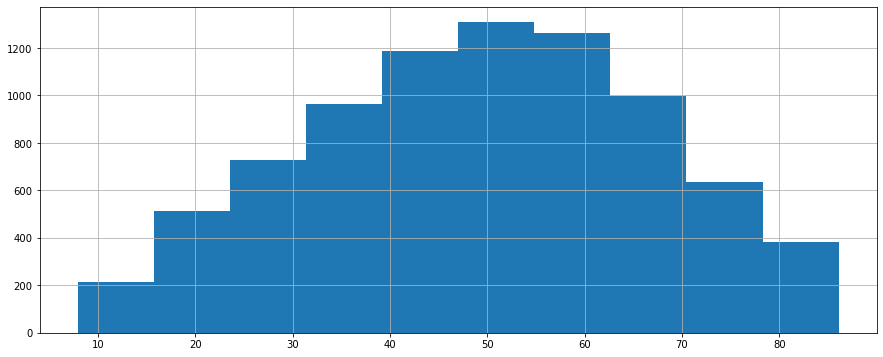

In [238]:
#scaled.sqrt_Item_Outlet_Sales.hist()
pd.Series(stats.yeojohnson(trimmed_data.Item_Outlet_Sales)[0]).hist()
# display the plot
plt.show()

In [239]:
# sqrt gives more normal data

In [240]:
#library to import train and test split
from sklearn.model_selection import train_test_split

In [241]:
trimmed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 0 to 8522
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8193 non-null   float64
 1   Item_Fat_Content           8193 non-null   int32  
 2   Item_Visibility            8193 non-null   float64
 3   Item_MRP                   8193 non-null   float64
 4   Outlet_Establishment_Year  8193 non-null   int64  
 5   Outlet_Size                8193 non-null   int32  
 6   Outlet_Location_Type       8193 non-null   int64  
 7   Item_Outlet_Sales          8193 non-null   float64
 8   Baking Goods               8193 non-null   uint8  
 9   Breads                     8193 non-null   uint8  
 10  Breakfast                  8193 non-null   uint8  
 11  Canned                     8193 non-null   uint8  
 12  Dairy                      8193 non-null   uint8  
 13  Frozen Foods               8193 non-null   uint8

In [242]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [243]:
#split the data in x and y
x= trimmed_data.drop(['Item_Outlet_Sales','sqrt_Item_Outlet_Sales'],axis=1)
y = trimmed_data[['sqrt_Item_Outlet_Sales','Item_Outlet_Sales']]
x = sm.add_constant(x)

In [244]:
# split the x and y in train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [245]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(xtest.shape)

(6554, 46)
(6554, 2)
(1639, 46)
(1639, 46)


### Build the multiple linear regression model using the OLS method.

In [246]:
linreg_full_model_withsqrt = sm.OLS(ytrain["sqrt_Item_Outlet_Sales"], xtrain).fit()

# print the summary output
print(linreg_full_model_withsqrt.summary())

                              OLS Regression Results                              
Dep. Variable:     sqrt_Item_Outlet_Sales   R-squared:                       0.635
Model:                                OLS   Adj. R-squared:                  0.634
Method:                     Least Squares   F-statistic:                     454.3
Date:                    Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                            18:16:33   Log-Likelihood:                -24597.
No. Observations:                    6554   AIC:                         4.925e+04
Df Residuals:                        6528   BIC:                         4.942e+04
Df Model:                              25                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [247]:
#MLR_model = sm.OLS(ytrain, xtrain).fit()

# print the summary output
#print(MLR_model.summary())

In [248]:
MLR_pvalues = pd.DataFrame(linreg_full_model_withsqrt.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.788766
Item_Weight,0.329948
Item_Fat_Content,0.223159
Item_Visibility,0.930110
Item_MRP,0.000000
Outlet_Establishment_Year,0.529485
Outlet_Size,0.581862
Outlet_Location_Type,0.695462
Baking Goods,0.914940
Breads,0.856165


In [249]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from statsmodels.tools.eval_measures import rmse


In [250]:

linreg_full_model_withsqrt_predictions = linreg_full_model_withsqrt.predict(xtest)

In [251]:
predicted_claim = np.square(linreg_full_model_withsqrt_predictions)
actual_claim = ytest['Item_Outlet_Sales']

In [252]:
linreg_full_model_withsqrt_rmse = rmse(actual_claim, predicted_claim)
linreg_full_model_withsqrt_rsquared = linreg_full_model_withsqrt.rsquared
linreg_full_model_withsqrt_rsquared_adj = linreg_full_model_withsqrt.rsquared_adj 

In [253]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [254]:
linreg_full_model_withsqrt_metrics = pd.Series({
                     'Model_Name': "Linreg full model with sqrt of target variable",
                     'RMSE':linreg_full_model_withsqrt_rmse,
                     'R-Squared': linreg_full_model_withsqrt_rsquared,
                     'Adj. R-Squared': linreg_full_model_withsqrt_rsquared_adj     
                   })


score_card = score_card.append(linreg_full_model_withsqrt_metrics, ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with sqrt of target variable,0.634996,0.633598,1009.257854


In [255]:
linreg_full_model_withoutsqrt = sm.OLS(ytrain['Item_Outlet_Sales'], xtrain).fit()
print(linreg_full_model_withoutsqrt.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     319.6
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:16:33   Log-Likelihood:                -54599.
No. Observations:                6554   AIC:                         1.093e+05
Df Residuals:                    6528   BIC:                         1.094e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [256]:
predicted_claim = linreg_full_model_withoutsqrt.predict(xtest)
actual_claim = ytest['Item_Outlet_Sales']

In [257]:
linreg_full_model_withoutsqrt_rmse = rmse(actual_claim, predicted_claim)
linreg_full_model_withoutsqrt_rsquared = linreg_full_model_withoutsqrt.rsquared
linreg_full_model_withoutsqrt_rsquared_adj = linreg_full_model_withoutsqrt.rsquared_adj 

In [258]:
linreg_full_model_withoutsqrt_metrics = pd.Series({
                     'Model_Name': "Linreg full model without sqrt of target variable",
                     'RMSE':linreg_full_model_withoutsqrt_rmse,
                     'R-Squared': linreg_full_model_withoutsqrt_rsquared,
                     'Adj. R-Squared': linreg_full_model_withoutsqrt_rsquared_adj     
                   })
score_card = score_card.append(linreg_full_model_withoutsqrt_metrics, ignore_index=True)

score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with sqrt of target variable,0.634996,0.633598,1009.257854
1,Linreg full model without sqrt of target variable,0.550348,0.548626,1022.343678


### regularization

### ridge

In [259]:
ridge_regression = sm.OLS(ytrain, xtrain)
results_fu = ridge_regression.fit()

In [260]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)
y=scale.fit_transform(y)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import Ridge
model1 = Ridge(max_iter=100)
model1.fit(xtrain, ytrain)
ypred = model.predict(xtest)

ytest = scale.inverse_transform(ytest)
ypred = scale.inverse_transform(ypred)

from sklearn import metrics
print("R2 score", metrics.r2_score(ytest, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

R2 score 0.5587873685216395
RMSE: 743.280965442158


### lasso

In [261]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)
y=scale.fit_transform(y)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import Lasso
model2 = Lasso(max_iter=100)
model2.fit(xtrain, ytrain)
ypred = pd.DataFrame(model2.predict(xtest))

ytest = scale.inverse_transform(ytest)
ypred = scale.inverse_transform(ypred)

from sklearn import metrics
print("R2 score", metrics.r2_score(ytest, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

R2 score -0.00021311685464864283
RMSE: 1.0056703160259126


### elasticnet

In [262]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)
y=scale.fit_transform(y)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import ElasticNet
model3 = ElasticNet(max_iter=100)
model3.fit(xtrain, ytrain)
ypred = pd.DataFrame(model3.predict(xtest))

ytest = scale.inverse_transform(ytest)
ypred = scale.inverse_transform(ypred)

from sklearn import metrics
print("R2 score", metrics.r2_score(ytest, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

R2 score 0.046903688236181074
RMSE: 0.9816912560434212


### Random forest regressor

In [263]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)
y=scale.fit_transform(y)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()
model4.fit(xtrain, ytrain)
ypred = pd.DataFrame(model4.predict(xtest))

ytest = scale.inverse_transform(ytest)
ypred = scale.inverse_transform(ypred)

from sklearn import metrics
print("R2 score", metrics.r2_score(ytest, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

R2 score 0.5778121133660334
RMSE: 0.653306039537844


### XGB Regressor

In [148]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)
y=scale.fit_transform(y)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=7)

from xgboost import XGBRegressor
model5 = XGBRegressor()
model5.fit(xtrain, ytrain)
ypred = pd.DataFrame(model5.predict(xtest))

ytest = scale.inverse_transform(ytest)
ypred = scale.inverse_transform(ypred)

from sklearn import metrics
print("R2 score", metrics.r2_score(ytest, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

R2 score 0.5587873712436959
RMSE: 0.6678628740894026


In [133]:
import pickle

In [268]:
with open('regression.pkl','wb') as file:
    pickle.dump(linreg_full_model_withsqrt,file)

In [269]:
with open('ridgeregularized.pkl','wb') as file:
    pickle.dump(model1,file)

In [270]:
with open('Lassoregularized.pkl','wb') as file:
    pickle.dump(model2,file)

In [271]:
with open('Elasticnetregularized.pkl','wb') as file:
    pickle.dump(model3,file)

In [272]:
with open('randomforestregression.pkl','wb') as file:
    pickle.dump(model4,file)

In [275]:
with open('XGBregressor.pkl','wb') as file:
    pickle.dump(model4,file)

In [139]:
#prediction=reg.predict([[]])